### Raiffeisen Data Cup
#### Оценка алгоритма
##### Задача
Метрикой качества в задаче является процент попаданий в окружность радиуса 0.02 градуса относительно координат дома и работы клиента.



где N - число всех клиентов.



 - радиус круга (0.02 градуса)
 - предсказанные координаты
 - точные координаты




##### Пример решения
Ваше решение должно соответствовать примеру, отправлено в формате .csv.
Файл с решением в следующем формате (файл пример):

|\_ID\_|\_WORK\_LAT\_|\_WORK\_LON\_|\_HOME\_LAT\_|\_HOME\_LON\_|
|---|---|---|---|---|
|00011683ccb426637fe9a4cd35e4606e|56.97555949769999|81.78240341002444|55.48125789716683|82.9504024678061|
|0002d0f8a642272b45c292c12ab6e602|44.53501374717161|42.78240341002444|44.04468227709194|42.88871746385218
|0004d182d9fede3ba0534b2d5e5ad27e,|43.78240341002444|39.53501374717161|43.57974377266892|39.719449340825186
|0009c2445518c9392cb356c5c3db3392|51.039873150135605|46.878401281493794|51.04468227709194|45.04468227709194


'\_ID\_' соответствует 'customer\_id' из данных.

1. Сколько на одного клиента приходится записей, статистика

In [24]:
import numpy as np
import pandas as pd
from pymongo import MongoClient

client = MongoClient('mongodb://172.17.0.2:27017')
db = client.raiffeisen_data_cup

In [ ]:
customers = {}
for rec in db.train.find():
    try:
        customers[rec['customer_id']].append(rec)
    except KeyError:
        customers[rec['customer_id']] = [rec]
    
print('Всего: ' + str(len(customers)))

In [53]:
#import seaborn as sns
#df = sns.load_dataset('iris')
#sns.distplot(a=list(customers.values()), bins=100, hist=True, kde=False, rug=False)

print(customers['0dc0137d280a2a82d2dc89282450ff1b'])

In [56]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

number of estimated clusters : 3


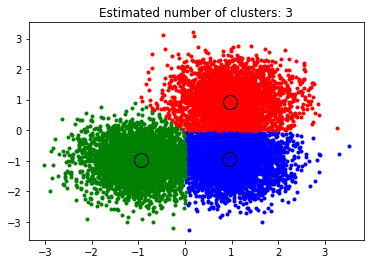

In [60]:
# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()